# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*numpy.sin(x) - (((x**2)-2)*numpy.cos(x)) -2)

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return (g(xmax) - g(xmin))

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax - xmin)/N
    xvalues=[]
    mvalues=[]
    p = (dx/6)*(f(xmin)+f(xmax))
    
    for i in range(N+1):
        xvalues.append(xmin+(i*dx))
            
    for i in range(N):
        mvalues.append(xvalues[i+1]-(dx/2))
        
    for i in range(N):
        p = p + (dx/6)*(4*f(mvalues[i]))
    
    for i in range(N-1):
        p = p + (dx/6)*2*f(xvalues[i+1])
    
    return p
 
    

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0,0.5,'Fractional error (log$_{10}$)')

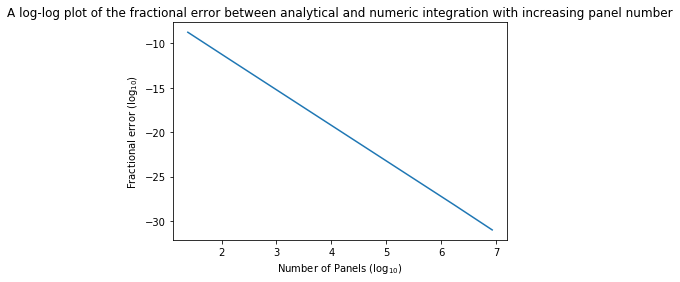

In [15]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
numresults = []
fractionalerror = []
xlog = []
ylog = []
for i in range(len(panel_counts)):
    numresults.append(integrate_numeric(x0, x1, panel_counts[i]))
for i in range(len(numresults)):
    fractionalerror.append((result_analytic-numresults[i])/numresults[i])
for i in range(len(fractionalerror)):
    xlog.append(numpy.log(panel_counts[i]))
    ylog.append(numpy.log(fractionalerror[i]))

plt.plot(xlog, ylog)
plt.title("A log-log plot of the fractional error between analytical and numeric integration with increasing panel number")
plt.xlabel("Number of Panels (log$_{10}$)")
plt.ylabel("Fractional error (log$_{10}$)")
    


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels increases the accuracy of the numerical method to a limit, but as the number of panels becomes very large, the accuracy decreases partially and fluctuates. This is a result of rounding issues associated with the number of decimal places allowed by the program.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

For the trapezium rule, the accuracy increases with panel count, even with very large counts. However the Simpson's rule is generally more accurate than the trapezium rule for any number of panels.